<a href="https://colab.research.google.com/github/samarawwleticia/challengedadosalura/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [22]:
qtd_vendida_loja = len(loja['Preço'])
faturamentoTotal_loja = loja['Preço'].sum()

qtd_vendida_loja2 = len(loja2['Preço'])
faturamentoTotal_loja2 = loja2['Preço'].sum()

qtd_vendida_loja3 = len(loja3['Preço'])
faturamentoTotal_loja3 = loja3['Preço'].sum()

qtd_vendida_loja4 = len(loja4['Preço'])
faturamentoTotal_loja4 = loja4['Preço'].sum()

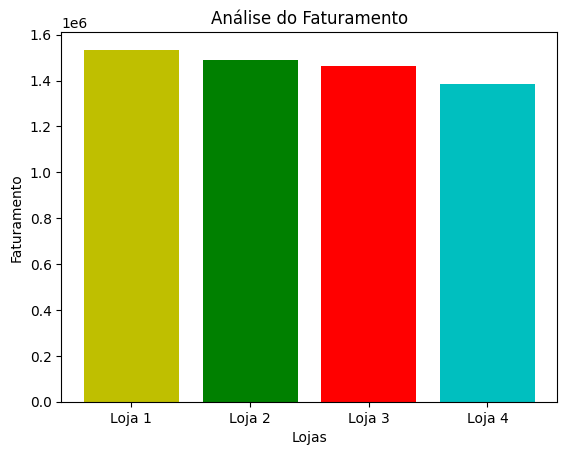

In [70]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Coloquei cores só para diferencias as lojas mas não consegui reutiliza-las em todos os gráficos
cores = ['y', 'g', 'r', 'c']

faturamentos = [faturamentoTotal_loja, faturamentoTotal_loja2, faturamentoTotal_loja3, faturamentoTotal_loja4]

plt.bar(x = lojas, height = faturamentos, color = cores)
plt.title("Análise do Faturamento")
plt.xlabel("Lojas")
plt.ylabel("Faturamento")
plt.show()

In [31]:
# Verificação dos valores, uma vez que no gráfico estão em outro formato por via de estética.
print("Faturamento da Loja 1: ", faturamentoTotal_loja)
print("Faturamento da Loja 2: ",faturamentoTotal_loja2)
print("Faturamento da Loja 3: ",faturamentoTotal_loja3)
print("Faturamento da Loja 4: ",faturamentoTotal_loja4)

Faturamento da Loja 1:  1534509.12
Faturamento da Loja 2:  1488459.06
Faturamento da Loja 3:  1464025.03
Faturamento da Loja 4:  1384497.58


Como pode ser observado, o faturamento da Loja 1 é o maior entre todas as lojas. Foi melhor reduzir o número de casas decimais para a plotagem do gráfico, então eu coloquei logo abaixo os números em casas decimais. No caso da loja 1, o faturamento total é de R$1.534.509,12 ou Um milhão e quinhentos e trinta e quatro mil e quinhentos e nove reais com doze centavos. É a única loja que chegou a 1.5 milhões.

# 2. Vendas por Categoria

In [45]:
# Basicamente o que estou fazendo aqui é contando cada Produto por categoria

vendaporCategoria_loja = loja.groupby('Categoria do Produto')['Produto'].count()
vendaporCategoria_loja2 = loja2.groupby('Categoria do Produto')['Produto'].count()
vendaporCategoria_loja3 = loja3.groupby('Categoria do Produto')['Produto'].count()
vendaporCategoria_loja4 = loja4.groupby('Categoria do Produto')['Produto'].count()

In [52]:
import numpy as np

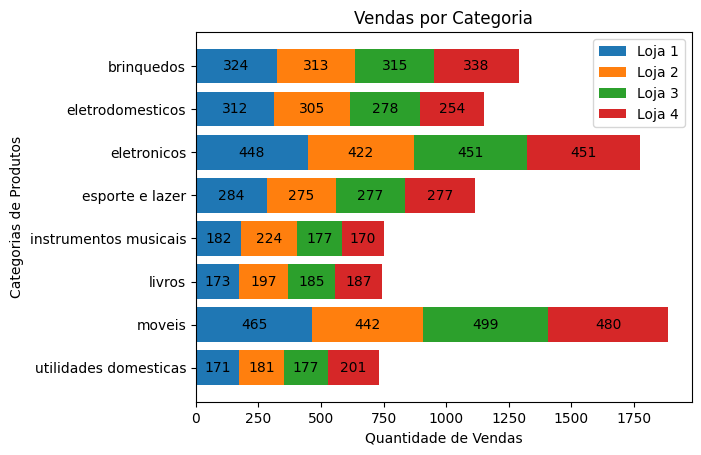

In [69]:
valor = list(vendaporCategoria_loja.values)
valor2 = list(vendaporCategoria_loja2.values)
valor3 = list(vendaporCategoria_loja3.values)
valor4 = list(vendaporCategoria_loja4.values)

valores = {
      'Loja 1': np.array(valor),
      'Loja 2': np.array(valor2),
      'Loja 3': np.array(valor3),
      'Loja 4': np.array(valor4)
}

fig, ax = plt.subplots()
bottom = np.zeros(len(produtos_loja))
for loja, valor in valores.items():
    p = ax.barh(produtos_loja, valor, label=loja, left=bottom)
    bottom += valor
    ax.bar_label(p, label_type='center')

ax.set_title('Vendas por Categoria')
ax.invert_yaxis()
ax.set_ylabel('Categorias de Produtos')
ax.set_xlabel('Quantidade de Vendas')
ax.legend()
plt.show()

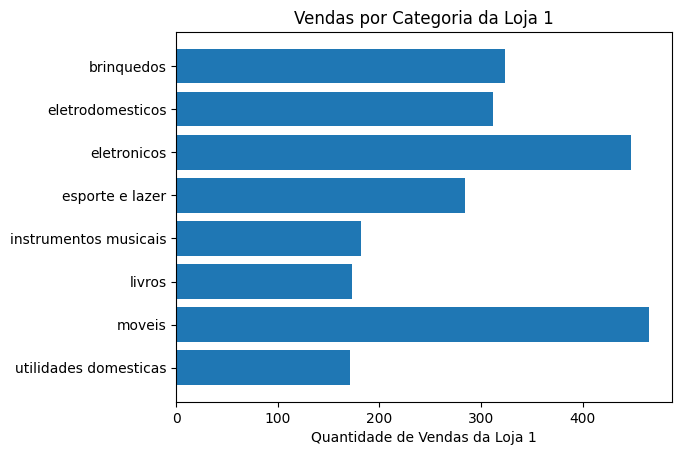

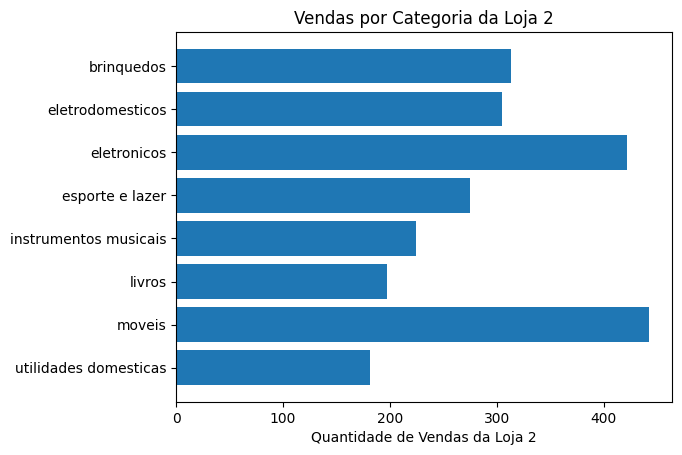

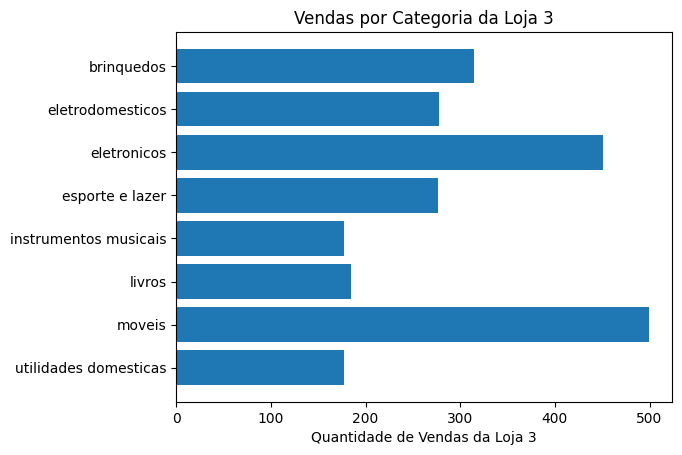

Text(0.5, 1.0, 'Vendas por Categoria da Loja 4')

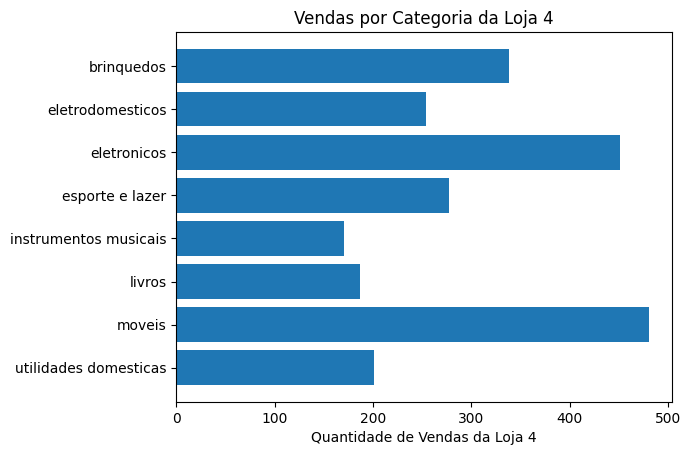

In [84]:
# ------------- Loja 1 -------------------------
produtos_loja = list(vendaporCategoria_loja.index)
valor = list(vendaporCategoria_loja.values)

fig, ax = plt.subplots()
y_pos = np.arange(len(produtos_loja))

ax.barh(y_pos, valor, align='center')
ax.set_yticks(y_pos, labels=produtos_loja)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 1')
ax.set_title('Vendas por Categoria da Loja 1')

# ------------ Loja 2 ---------------------------
produtos_loja2 = list(vendaporCategoria_loja2.index)
valor2 = list(vendaporCategoria_loja2.values)

fig, ax = plt.subplots()
y_pos = np.arange(len(produtos_loja2))

ax.barh(y_pos, valor2, align='center')
ax.set_yticks(y_pos, labels=produtos_loja2)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 2')
ax.set_title('Vendas por Categoria da Loja 2')

# ----------------- Loja 3 ------------------------
produtos_loja3 = list(vendaporCategoria_loja3.index)
valor3 = list(vendaporCategoria_loja3.values)

fig, ax = plt.subplots()
y_pos = np.arange(len(produtos_loja3))

ax.barh(y_pos, valor3, align='center')
ax.set_yticks(y_pos, labels=produtos_loja3)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 3')
ax.set_title('Vendas por Categoria da Loja 3')
plt.show()

# ------------------ Loja 4 -----------------------
produtos_loja4 = list(vendaporCategoria_loja4.index)
valor4 = list(vendaporCategoria_loja4.values)

fig, ax = plt.subplots()
y_pos = np.arange(len(produtos_loja4))

ax.barh(y_pos, valor4, align='center')
ax.set_yticks(y_pos, labels=produtos_loja4)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 4')
ax.set_title('Vendas por Categoria da Loja 4')

# 3. Média de Avaliação das Lojas


# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja

# Rascunho

In [34]:
vendaporCategoria_loja = loja.groupby('Categoria do Produto')['Preço'].sum()
vendaporCategoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
vendaporCategoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
vendaporCategoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

In [40]:
produtos = list(loja['Categoria do Produto'].unique())
produtos

['eletronicos',
 'moveis',
 'brinquedos',
 'eletrodomesticos',
 'utilidades domesticas',
 'esporte e lazer',
 'livros',
 'instrumentos musicais']

In [41]:
produtos = list(vendaporCategoria_loja.index)
vendas =

['brinquedos',
 'eletrodomesticos',
 'eletronicos',
 'esporte e lazer',
 'instrumentos musicais',
 'livros',
 'moveis',
 'utilidades domesticas']

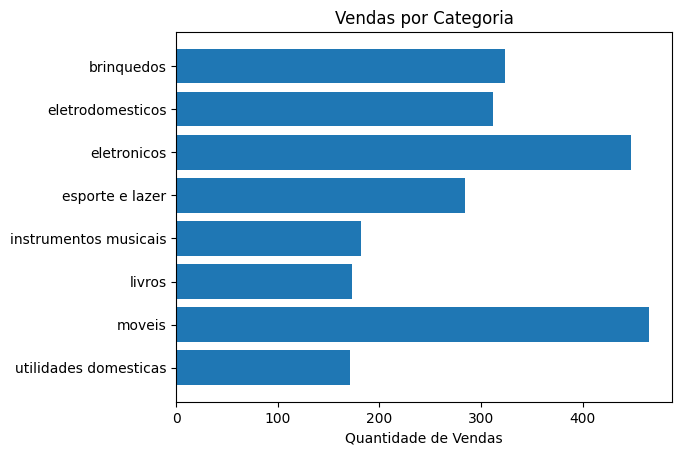

In [53]:
produtos_loja = list(vendaporCategoria_loja.index)
valor = list(vendaporCategoria_loja.values)

fig, ax = plt.subplots()
y_pos = np.arange(len(produtos_loja))

ax.barh(y_pos, valor, align='center')
ax.set_yticks(y_pos, labels=produtos_loja)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas')
ax.set_title('Vendas por Categoria')

plt.show()